In [3]:
import numpy as np
import matplotlib.pyplot as plt

from distributions.distribution_by_sequence import DistributionBySequence
from distributions.distribution import Distribution
from distributions.sequence import Sequence
from algorithms.semi_bandit_exp3 import SemiBanditExp3
from algorithms.uniform_random import UniformRandom
from experiment_manager.experiment_manager import ExperimentManager

from distributions.contexts.binary_context import BinaryContext
from distributions.thetas.single_hole import SingleHole
from distributions.thetas.independent_bernoulli import IndependentBernoulli

In [4]:
exp_manager = ExperimentManager()
algos = [SemiBanditExp3(), UniformRandom()]

length = 2000
d = 2
K = 2
actionset = []
for i in range(K):
    buffer = np.zeros(K, dtype=bool)
    buffer[i] = 1
    actionset.append(buffer)
actionset = np.array(actionset)

dist_holes = Distribution(BinaryContext(d), SingleHole(K, d, np.array([0.7, 0.3])), actionset)

epsilon = 0.25 * np.min([np.sqrt(K / length), 1])
print(epsilon)
p = np.zeros((d, K)) + 0.5
for i in range(d):
    p[i, np.random.randint(K)] -= epsilon

dist_lower_bound = Distribution(BinaryContext(d), IndependentBernoulli(d, K, p), actionset)

0.007905694150420948


In [5]:
data = exp_manager.run(1, [1000, 2000, 5000], algos, [dist_lower_bound])
data

array([[ 19.,   0.,  57.],
       [ 10., -20.,  38.]])

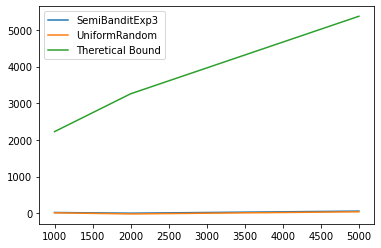

: 

In [6]:
m = K
def theoretical_bound(T):
    return 8 * m * np.sqrt(T * K * d * np.log(np.e * K / m) * np.log(np.sqrt(T) * m * dist_lower_bound.context.true_sigma * dist_lower_bound.thetas.true_R))

import matplotlib.pyplot as plt

plt.plot([1000, 2000, 5000], data[0], label="SemiBanditExp3")
plt.plot([1000, 2000, 5000], data[1], label="UniformRandom")
plt.plot([1000, 2000, 5000], theoretical_bound(np.array([1000, 2000, 5000])), label="Theretical Bound")
plt.legend()
plt.show()